In [1]:
from astropy.table import Table
import pandas as pd
import numpy as np
import pylab as pl

In [2]:
params = {'legend.fontsize': '20',
          'figure.figsize': (10, 10),
         'axes.labelsize': '20',
         'axes.titlesize':'20',
         'xtick.labelsize':'20',
         'ytick.labelsize':'20',
         'axes.labelpad' : '20'}
pl.rcParams.update(params)

In [3]:
#Analysis of the filaments in GAMA
df = pd.read_csv('./data/filaments_ddp1_g15.csv')

In [4]:
df.keys()

Index(['Unnamed: 0', 'id_fila', 'x_fila', 'y_fila', 'z_fila'], dtype='object')

In [5]:
def distance(x,y,z,ids):
    N = len(x)
    Nf = len(np.unique(ids))
    distances = []
    ID = []
    for i in range(Nf):
        dis_temp = []
        id_temp = []
        x_temp = np.array(df['x_fila'][df['id_fila'] == i])
        y_temp = np.array(df['y_fila'][df['id_fila'] == i])
        z_temp = np.array(df['z_fila'][df['id_fila'] == i])
        for j in range(len(x_temp)-1):
            d = np.sqrt(  (x_temp[j]-x_temp[j+1])**2 + (y_temp[j]-y_temp[j+1])**2 + (z_temp[j]-z_temp[j+1])**2 )
            dis_temp.append(d)
            id_temp.append(i)
            # if d>20: print(i)
        distances.append(dis_temp)
        ID.append(id_temp)
    return distances, ID

In [6]:
D, ID = distance(df['x_fila'],df['y_fila'],df['z_fila'],df['id_fila'])

In [7]:
D = np.concatenate(D).ravel()
ID = np.concatenate(ID).ravel()

Text(0.5, 0, 'Filament segments lenght [Mpc/h]')

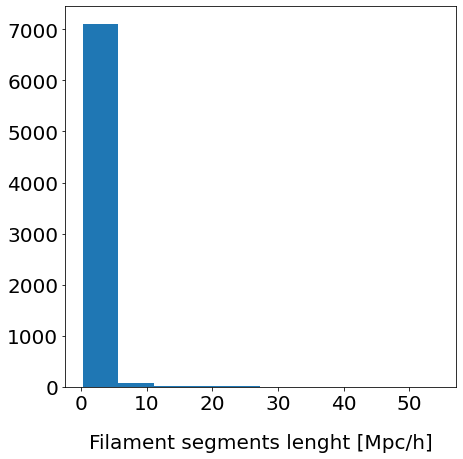

In [13]:
# PLotting the filaments segment lengh
fig = pl.figure(figsize=(7,7))
_ = pl.hist(D)
pl.xlabel('Filament segments lenght [Mpc/h]')

Text(0.5, 0, 'Filament segments lenght [Mpc/h] < 10Mpc/h')

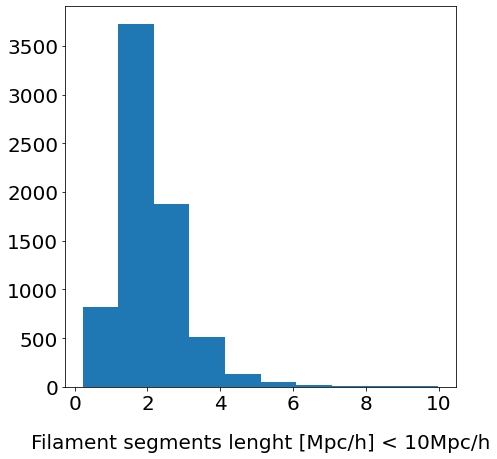

In [14]:
# filtering for lenghts < 10
fig = pl.figure(figsize=(7,7))
_ = pl.hist(D[D<10])
pl.xlabel('Filament segments lenght [Mpc/h] < 10Mpc/h')

Text(0.5, 0, 'z Mpc/h')

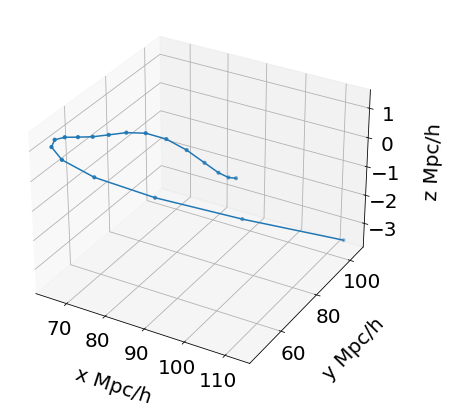

In [10]:
# Plot a filament with filament segments lenght > 20Mpc
fig = pl.figure(figsize=(7,7))
ax = pl.axes(projection='3d')
ii = np.array(df['id_fila']) == 34
ax.plot3D( np.array(df['x_fila'])[ii], np.array(df['y_fila'])[ii], np.array(df['z_fila'])[ii] )
ax.scatter3D( np.array(df['x_fila'])[ii], np.array(df['y_fila'])[ii], np.array(df['z_fila'])[ii] , s= 10)
ax.set_xlabel('x Mpc/h')
ax.set_ylabel('y Mpc/h')
ax.set_zlabel('z Mpc/h')

In [11]:
D[ID == 34]

array([26.88663767, 22.19040438, 14.87553482,  7.65055327,  2.30551081,
        1.03529066,  2.56517644,  3.29352911,  3.69303467,  4.03590225,
        4.42604817,  4.83371962,  5.1088038 ,  5.0416708 ,  4.50857884,
        3.61025807,  2.67413488,  2.08950484])

In [12]:
np.array(df['x_fila'])[ii], np.array(df['y_fila'])[ii], np.array(df['z_fila'])[ii]

(array([112.5   ,  95.5644,  81.5402,  72.0401,  67.0081,  65.3214,
         65.6668,  67.0612,  68.9398,  71.0544,  73.3686,  75.9609,
         78.8989,  82.1092,  85.3273,  88.1848,  90.3947,  91.9166,
         93.    ]),
 array([104.    ,  83.157 ,  65.9996,  54.5931,  48.8736,  47.3647,
         48.3201,  50.4731,  53.1774,  56.2043,  59.5107,  63.0981,
         66.9348,  70.8985,  74.7527,  78.2028,  81.0281,  83.2153,
         85.    ]),
 array([-3.5      , -2.217    , -1.05103  , -0.0911374,  0.61403  ,
         1.05408  ,  1.25342  ,  1.27265  ,  1.20224  ,  1.13261  ,
         1.10607  ,  1.08499  ,  0.972143 ,  0.684163 ,  0.22873  ,
        -0.279981 , -0.689841 , -0.915615 , -1.       ]))

In [13]:
for i in range(sum(ii)-1):
    d  = (np.array(df['x_fila'])[ii][i] - np.array(df['x_fila'])[ii][i+1])**2 
    d += (np.array(df['y_fila'])[ii][i] - np.array(df['y_fila'])[ii][i+1])**2
    d += (np.array(df['z_fila'])[ii][i] - np.array(df['z_fila'])[ii][i+1])**2
    d = np.sqrt(d)
    # print(d)

In [14]:
Len_fila = np.zeros(len(np.unique(ID)))
for i in np.unique(ID):
    Len_fila[i] = sum(D[ID==i])

Text(0.5, 0, 'Filaments Lenght [Mpc/h]')

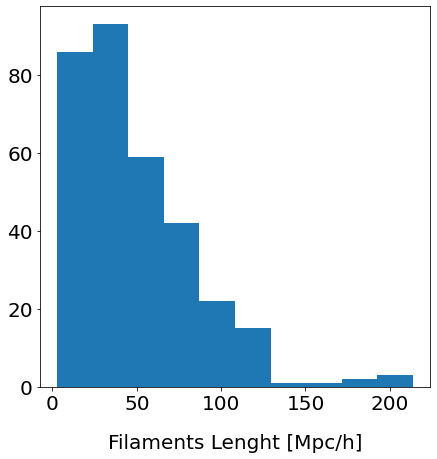

In [15]:
# Hist of the lenght of the filaments
fig = pl.figure(figsize=(7,7))
_ = pl.hist(Len_fila)
pl.xlabel('Filaments Lenght [Mpc/h]')